In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import pylab

In [2]:
dt = .001
tau = .1
noise_tau = .002
w11, w22 = 1, 1
w21, w12 = 1, 1
dur = 1.5
bifurcate_time = 0
sgm = 5
threshold = 70
S = 250
R_initial = 32
eta = S*.03

In [3]:
def get_dynamic_arr(coh, a, b):

    alpha = a
    beta = 0
    V1, V2 = S, S

    R1_arr = np.zeros(int(dur/dt))
    R2_arr = np.zeros(int(dur/dt))
    R1_arr[0] = ((alpha-1) + np.sqrt((1-alpha)**2 + 4*S*(w11+w12-beta))) / (2*(w11+w12-beta))
    R2_arr[0] = ((alpha-1) + np.sqrt((1-alpha)**2 + 4*S*(w22+w21-beta))) / (2*(w22+w21-beta))

    G1_arr = np.zeros(int(dur/dt))
    G2_arr = np.zeros(int(dur/dt))
    G1_arr[0], G2_arr[0] = (w11+w12-beta)*R1_arr[0], (w22+w21-beta)*R2_arr[0]

    D1_arr = np.zeros(int(dur/dt))
    D2_arr = np.zeros(int(dur/dt))
    D1_arr[0], D2_arr[0] = beta*R1_arr[0], beta*R2_arr[0]

    noise_R1 = np.zeros(int(dur/dt))
    noise_R2 = np.zeros(int(dur/dt))
    noise_G1 = np.zeros(int(dur/dt))
    noise_G2 = np.zeros(int(dur/dt))
    noise_D1 = np.zeros(int(dur/dt))
    noise_D2 = np.zeros(int(dur/dt))

    for ti in range(1, int(dur/dt)):

        if ti >= bifurcate_time/dt:
                beta = b

        if ti >= bifurcate_time/dt and ti % 5 == 0:
                V1 = S*(1+coh) + np.random.randn() * eta
                V2 = S*(1-coh) + np.random.randn() * eta

        d_noiseR1 = (-noise_R1[ti-1] + np.random.randn() * np.sqrt(dt) * sgm) / noise_tau*dt
        d_noiseR2 = (-noise_R2[ti-1] + np.random.randn() * np.sqrt(dt) * sgm) / noise_tau*dt
        d_noiseG1 = (-noise_G1[ti-1] + np.random.randn() * np.sqrt(dt) * sgm) / noise_tau*dt
        d_noiseG2 = (-noise_G2[ti-1] + np.random.randn() * np.sqrt(dt) * sgm) / noise_tau*dt
        d_noiseD1 = (-noise_D1[ti-1] + np.random.randn() * np.sqrt(dt) * sgm) / noise_tau*dt
        d_noiseD2 = (-noise_D2[ti-1] + np.random.randn() * np.sqrt(dt) * sgm) / noise_tau*dt

        d_R1 = (-R1_arr[ti-1] + (alpha * R1_arr[ti-1] + V1) / (1 + G1_arr[ti-1])) * dt/tau
        d_R2 = (-R2_arr[ti-1] + (alpha * R2_arr[ti-1] + V2) / (1 + G2_arr[ti-1])) * dt/tau
        d_G1 = (-G1_arr[ti-1] + w11*R1_arr[ti-1] + w12*R2_arr[ti-1] - D1_arr[ti-1]) * dt/tau
        d_G2 = (-G2_arr[ti-1] + w21*R1_arr[ti-1] + w22*R2_arr[ti-1] - D2_arr[ti-1]) * dt/tau
        d_D1 = (-D1_arr[ti-1] + beta*R1_arr[ti-1]) *dt/tau
        d_D2 = (-D2_arr[ti-1] + beta*R2_arr[ti-1]) *dt/tau

        noise_R1[ti] = noise_R1[ti-1] + d_noiseR1
        noise_R2[ti] = noise_R2[ti-1] + d_noiseR2
        noise_G1[ti] = noise_G1[ti-1] + d_noiseG1
        noise_G2[ti] = noise_G2[ti-1] + d_noiseG2
        noise_D1[ti] = noise_D1[ti-1] + d_noiseD1
        noise_D2[ti] = noise_D2[ti-1] + d_noiseD2

        R1_arr[ti] = max(R1_arr[ti-1] + d_R1 + noise_R1[ti], 0)
        R2_arr[ti] = max(R2_arr[ti-1] + d_R2 + noise_R2[ti], 0)
        G1_arr[ti] = max(G1_arr[ti-1] + d_G1 + noise_G1[ti], 0)
        G2_arr[ti] = max(G2_arr[ti-1] + d_G2 + noise_G2[ti], 0)
        D1_arr[ti] = max(D1_arr[ti-1] + d_D1 + noise_D1[ti], 0)
        D2_arr[ti] = max(D2_arr[ti-1] + d_D2 + noise_D2[ti], 0)

    return R1_arr, R2_arr, G1_arr, G2_arr, D1_arr, D2_arr

In [4]:
def draw_dynamic(c, a, b, color):
    R1_arr, R2_arr, G1_arr, G2_arr, D1_arr, D2_arr = get_dynamic_arr(c, a, b)

    plt.plot(R1_arr, color=color, linewidth=1.5, label='R1 (α=%d β=%.1f)' % (a, b))
    plt.plot(R2_arr, color=color, linestyle='--', linewidth=1, label='R2 (α=%d β=%.1f)' % (a, b))

    plt.xlabel("RT (ms)")
    plt.ylabel("Activity (Hz)")
    plt.ylim(top=85, bottom=0)
    plt.xlim(left=0)
    plt.title("Single Trial Dynamic")

    plt.tight_layout()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


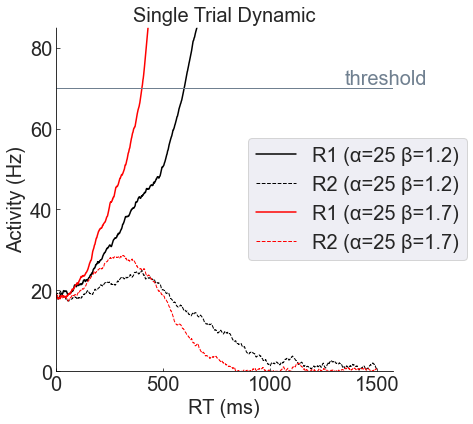

In [6]:
draw_dynamic(.256, 25, 1.2, 'black')
draw_dynamic(.256, 25, 1.7, 'red')
plt.hlines(y=70, xmin=0, xmax=1600, color='slategrey', linewidth=1)
plt.legend(loc='center right', bbox_to_anchor=(1.25, .5), fancybox=True)

plt.grid(False)
ax = plt.gca()
ax.tick_params(axis='x', direction="in")
ax.tick_params(axis="y", direction="in")
ax.tick_params(bottom=True, left=True)
ax.spines['bottom'].set_color('0')
ax.spines['left'].set_color('0')
ax.patch.set_facecolor('white')

font_size = 20
ax.annotate('threshold', (1350, 71), color='slategrey', fontsize=font_size)
params = {
    'figure.figsize': (7, 6),
     'legend.fontsize': font_size,
     'axes.labelsize': font_size,
     'axes.titlesize': font_size,
     'xtick.labelsize': font_size,
     'ytick.labelsize': font_size,
     'font.sans-serif':'Arial'
}
pylab.rcParams.update(params)
plt.tight_layout()

plt.savefig('Single Dynamic(25, 1.2, 1.7).tiff', format='tiff')
plt.savefig('Single Dynamic(25, 1.2, 1.7).eps', format='eps')